In [1]:
import os
import numpy as np
from astropy.table import Table

In [18]:
from desiutil.log import get_logger
log = get_logger()

In [35]:
import tempfile
os.environ['MPLCONFIGDIR'] = tempfile.mkdtemp()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks', font_scale=1.3)#, rc=rc)

%matplotlib inline

In [12]:
%env DESI_ROOT=/global/cfs/cdirs/desi
%env NYXGALAXY_DATA=/global/cfs/cdirs/desi/users/ioannis/nyxgalaxy

env: DESI_ROOT=/global/cfs/cdirs/desi
env: NYXGALAXY_DATA=/global/cfs/cdirs/desi/users/ioannis/nyxgalaxy


In [21]:
def read_results(tile, night):
    nyxgalaxy_dir = os.getenv('NYXGALAXY_DATA')
    qadir = os.path.join(nyxgalaxy_dir, 'qa')
    if not os.path.isdir(qadir):
        os.makedirs(qadir)

    nyxgalaxyfile = os.path.join(nyxgalaxy_dir, 'nyxgalaxy-{}-{}.fits'.format(tile, night))
    if not os.path.isfile(nyxgalaxyfile):
        log.info('Output file {} not found!'.format(nyxgalaxyfile))
        return
    nyxgalaxy = Table.read(nyxgalaxyfile)
    return nyxgalaxy

In [26]:
res = read_results(tile='70502', night='20200225')
res = res[res['CONTINUUM_CHI2'] > 0]

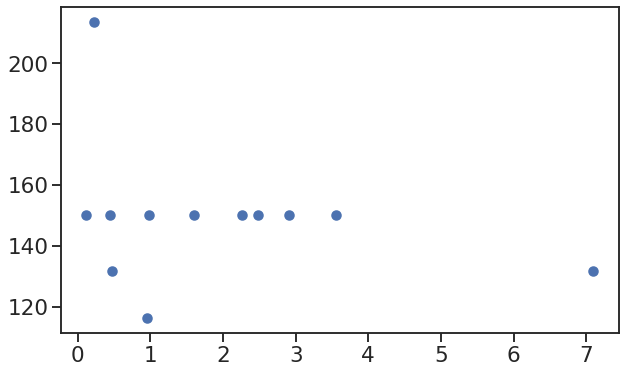

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(res['CONTINUUM_SNR'][:, 0], res['CONTINUUM_VDISP'])